# Machine Learning with Matrix Data for Recommender Systems


1. Recommender systems are a hot topic. Recommendation systems can be formulated as a
task of matrix completion in machine learning. Recommender systems aim to predict the
rating that a user will give for an item (e.g., a restaurant, a movie, a product).
2. Download the movie rating dataset from: https://www.kaggle.com/rounakbanik/themovies-
dataset. These files contain metadata for all 45,000 movies listed in the Full
MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data
points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages,
production companies, countries, TMDB vote counts and vote averages. This dataset also
has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are
on a scale of 1-5 and have been obtained from the official GroupLens website.
3. Building a small recommender system with the matrix data: “ratings.csv”. You can use the
recommender system library: Surprise (http://surpriselib.com), use other recommender
system libraries, or implement from scratches.






In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import KNNBasic
from surprise import Reader
from surprise import Dataset

#### A) Read data from “ratings.csv” with line format: 'userID movieID rating timestamp'

In [95]:
data1 = pd.read_csv("archive/ratings_small.csv")

In [96]:
data1.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [97]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [98]:
data1.nunique()

userId         671
movieId       9066
rating          10
timestamp    78141
dtype: int64

### Reading data with given line format

In [99]:
reader = Reader(line_format='user item rating timestamp',sep=',',skip_lines=1)
data = Dataset.load_from_file("archive/ratings_small.csv",reader)

In [100]:
data

#### B) MAE and RMSE are two famous metrics for evaluating the performances of a recommender system. The definition of MAE can be found via: https://en.wikipedia.org/wiki/Mean_absolute_error. The definition of RMSE can be found via: https://en.wikipedia.org/wiki/Root-mean-square_deviation.

#### C) Compute the average MAE and RMSE of the Probabilistic Matrix Factorization(PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation

#### D) Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE. Which ML model is the best in the movie rating data?

### Storing RMSE and MAE in below mentioned variable

In [192]:
RMSE = []
MAE = []

### Computing average MAE and RMSE for all three filtering algorithms 

## User Based CF

In [193]:
sim_options = {'user_based': True }
algo = KNNBasic(sim_options=sim_options,verbose=False)
d = cross_validate(algo,data,measures=['rmse', 'mae'],cv=5,verbose=False)
RMSE.append(d['test_rmse'].mean())
MAE.append(d['test_mae'].mean())

## Item Based CF

In [194]:
sim_options = {'user_based': False }
algo = KNNBasic(sim_options=sim_options,verbose=False)
d = cross_validate(algo,data,measures=['rmse', 'mae'],cv=5,verbose=False)
RMSE.append(d['test_rmse'].mean())
MAE.append(d['test_mae'].mean())

## PMF

In [195]:
algo = SVD(biased=False,verbose=False)
d = cross_validate(algo,data,measures=['rmse', 'mae'],cv=5,verbose=False)
RMSE.append(d['test_rmse'].mean())
MAE.append(d['test_mae'].mean())

## Comparison of RMSE and MAE for the 3 algorithms

In [196]:
RMSE

[0.9689812751547627, 0.9352164669258389, 1.0114812597752807]

In [197]:
MAE

[0.7446047668367275, 0.7212822968874251, 0.7809294149223514]

### Ans D) The value of RMSE and MAE is the smallest for User Based CF and is the largest for PMF. Item Based CF Model is the best in the movie rating data.

#### E) Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering. Plot your results. Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering?

In [117]:
UserCF_RMSE = []
UserCF_MAE = []
ItemCF_RMSE = []
ItemCF_MAE = []

## User Based CF

### Cosine

In [118]:
sim_options = {'name':'cosine','user_based': True }
algo = KNNBasic(sim_options=sim_options,verbose=False)
d = cross_validate(algo,data,measures=['rmse', 'mae'],cv=5,verbose=False)
UserCF_RMSE.append(d['test_rmse'].mean())
UserCF_MAE.append(d['test_mae'].mean())

### MSD

In [119]:
sim_options = {'name':'msd','user_based': True }
algo = KNNBasic(sim_options=sim_options,verbose=False)
d = cross_validate(algo,data,measures=['rmse', 'mae'],cv=5,verbose=False)
UserCF_RMSE.append(d['test_rmse'].mean())
UserCF_MAE.append(d['test_mae'].mean())

### Pearson Baseline

In [120]:
sim_options = {'name':'pearson_baseline','user_based': True }
algo = KNNBasic(sim_options=sim_options,verbose=False)
d = cross_validate(algo,data,measures=['rmse', 'mae'],cv=5,verbose=False)
UserCF_RMSE.append(d['test_rmse'].mean())
UserCF_MAE.append(d['test_mae'].mean())

### Plotting the graph

### Plotting the values in the below mentioned sequence:
#### Left to Right -> Cosine, MSD and Pearson Baseline

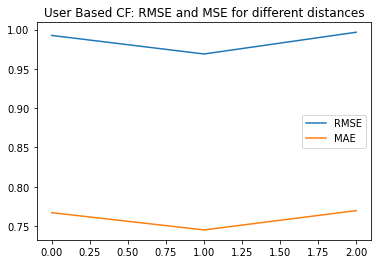

In [142]:
plt.title("User Based CF: RMSE and MSE for different distances")
plt.plot(UserCF_RMSE,label = 'RMSE')
plt.plot(UserCF_MAE, label = 'MAE')
plt.legend()

## Item Based CF

### Cosine

In [121]:
sim_options = {'name':'cosine','user_based': False }
algo = KNNBasic(sim_options=sim_options,verbose=False)
d = cross_validate(algo,data,measures=['rmse', 'mae'],cv=5,verbose=False)
ItemCF_RMSE.append(d['test_rmse'].mean())
ItemCF_MAE.append(d['test_mae'].mean())

### MSD

In [122]:
sim_options = {'name':'msd','user_based': False }
algo = KNNBasic(sim_options=sim_options,verbose=False)
d = cross_validate(algo,data,measures=['rmse', 'mae'],cv=5,verbose=False)
ItemCF_RMSE.append(d['test_rmse'].mean())
ItemCF_MAE.append(d['test_mae'].mean())

### Pearson Baseline

In [123]:
sim_options = {'name':'pearson_baseline','user_based': False }
algo = KNNBasic(sim_options=sim_options,verbose=False)
d = cross_validate(algo,data,measures=['rmse', 'mae'],cv=5,verbose=False)
ItemCF_RMSE.append(d['test_rmse'].mean())
ItemCF_MAE.append(d['test_mae'].mean())

### Plotting the graph

### Plotting the values in the below mentioned sequence:
#### Left to Right -> Cosine, MSD and Pearson Baseline

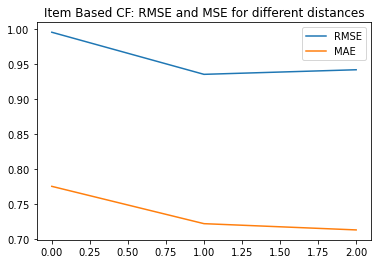

In [143]:
plt.title("Item Based CF: RMSE and MSE for different distances")
plt.plot(ItemCF_RMSE,label = 'RMSE')
plt.plot(ItemCF_MAE, label = 'MAE')
plt.legend()

### Ans) The impact of the three metrics on User based Collaborative Filtering is consistent with the impact of the three metrics on Item based Collaborative Filtering

#### F) Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results. 

## User Based CF

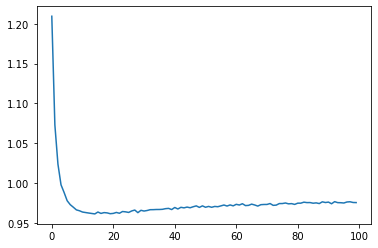

In [155]:
Range = range(1,101)
sim_options = {'user_based': True }
lst_User = []
for i in Range:
        algo1 = KNNBasic(k=i,sim_options=sim_options,verbose=False)
        j= cross_validate(algo1,data,measures=['rmse', 'mae'],cv=5,verbose=False)
        lst_User.append(j['test_rmse'].mean())
        
plt.plot(lst_User)

## Item based CF

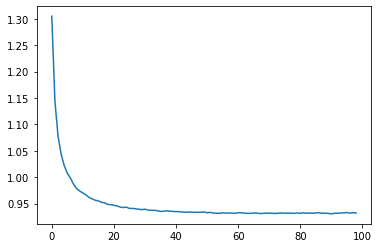

In [186]:
sim_options = {'user_based': False }
lst_Item = []
for i in range(1,100):
        algo1 = KNNBasic(k=i,sim_options=sim_options,verbose=False)
        j= cross_validate(algo1,data,measures=['rmse', 'mae'],cv=5,verbose=False)
        lst_Item.append(j['test_rmse'].mean())
        
plt.plot(lst_Item)

#### G) Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE. Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering?

In [189]:
K_min_for_Item = lst_Item.index(min(lst_Item))
K_min_for_User = lst_User.index(min(lst_User))

In [190]:
K_min_for_Item

90

In [191]:
K_min_for_User

14

### Ans G) Best K for User Based CF is 14 and for Item Based CF is 90

In [2]:
reader = Reader(line_format='user item rating timestamp',sep=',',skip_lines=1)
data1 = Dataset.load_from_file("archive/ratings.csv",reader)

In [3]:
algo = SVD(biased=False,verbose=False)
d = cross_validate(algo,data1,measures=['rmse', 'mae'],cv=5,verbose=False)

In [4]:
d['test_mae'].mean()

0.695118638582971

In [5]:
d['test_rmse'].mean()

0.92864448269517